# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data 
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp"] 
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                           "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | brookings
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | ibiruba
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | buka
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | sirsi
Processing Record 15 of Set 1 | nagqu
Processing Record 16 of Set 1 | ayame
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | aberdeen
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | hobbs
Processing Record 21 of Set 1 | peace river
Processing Record 22 of Set 1 | fisterra
Processing Record 23 of Set 1 | college


Processing Record 39 of Set 4 | chongwe
Processing Record 40 of Set 4 | xining
Processing Record 41 of Set 4 | fale old settlement
Processing Record 42 of Set 4 | sikasso
Processing Record 43 of Set 4 | afaahiti
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | wotho
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | vershino-darasunskiy
Processing Record 49 of Set 4 | sinabang
Processing Record 0 of Set 5 | prince rupert
Processing Record 1 of Set 5 | huangpi
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | port mathurin
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | verkhov'ye
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | piti village
Processing Record 8 of Set 5 | el calafate
Processing Record 9 of Set 5 | st albans
Processing Record 10 of Set 5 | koryazhma
Processing Record 11 of Set 5 | joao alfredo
Processing Record 12 of Set 5 | sain

Processing Record 29 of Set 8 | sault ste. marie
Processing Record 30 of Set 8 | konarka
Processing Record 31 of Set 8 | copala
Processing Record 32 of Set 8 | nieuw amsterdam
Processing Record 33 of Set 8 | port macquarie
Processing Record 34 of Set 8 | buriti alegre
Processing Record 35 of Set 8 | forster
Processing Record 36 of Set 8 | tommot
Processing Record 37 of Set 8 | nenjiang
Processing Record 38 of Set 8 | jinchang
Processing Record 39 of Set 8 | kirkwall
Processing Record 40 of Set 8 | gerash
Processing Record 41 of Set 8 | bocas del toro
Processing Record 42 of Set 8 | sao gabriel da cachoeira
Processing Record 43 of Set 8 | sarangani
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | kenai
Processing Record 46 of Set 8 | motygino
Processing Record 47 of Set 8 | sitka
Processing Record 48 of Set 8 | lihue
Processing Record 49 of Set 8 | gadzhiyevo
Processing Record 0 of Set 9 | crane
Processing Record 1 of Set 9 | medford
Processing Record 2 of Set 9

Processing Record 16 of Set 12 | muisne
Processing Record 17 of Set 12 | puerto deseado
Processing Record 18 of Set 12 | hampton bays
Processing Record 19 of Set 12 | island harbour
Processing Record 20 of Set 12 | gorshechnoye
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | colares
Processing Record 24 of Set 12 | igarka
Processing Record 25 of Set 12 | arvi
Processing Record 26 of Set 12 | pontianak
Processing Record 27 of Set 12 | garoowe
Processing Record 28 of Set 12 | fuyang
Processing Record 29 of Set 12 | chabua
Processing Record 30 of Set 12 | mableton
Processing Record 31 of Set 12 | colesberg
Processing Record 32 of Set 12 | linqiong
Processing Record 33 of Set 12 | praia da vitoria
Processing Record 34 of Set 12 | evergreen
Processing Record 35 of Set 12 | am djarass
City not found. Skipping...
Processing Record 36 of Set 12 | damghan
Processing Record 37 of Set 12 | marshfield
Processing Record 38 of Set 12 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,33.33,83,100,7.85,IS,Mon Oct 16 20:31:31 2023
1,brookings,44.3114,-96.7984,45.75,82,0,3.44,US,Mon Oct 16 20:31:32 2023
2,bethel,41.3712,-73.4140,50.95,82,100,3.44,US,Mon Oct 16 20:27:49 2023
3,margaret river,-33.9500,115.0667,71.89,57,100,12.55,AU,Mon Oct 16 20:31:32 2023
4,lebu,-37.6167,-73.6500,49.51,86,0,20.38,CL,Mon Oct 16 20:31:33 2023


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,33.33,83,100,7.85,IS,Mon Oct 16 20:31:31 2023
1,brookings,44.3114,-96.7984,45.75,82,0,3.44,US,Mon Oct 16 20:31:32 2023
2,bethel,41.3712,-73.4140,50.95,82,100,3.44,US,Mon Oct 16 20:27:49 2023
3,margaret river,-33.9500,115.0667,71.89,57,100,12.55,AU,Mon Oct 16 20:31:32 2023
4,lebu,-37.6167,-73.6500,49.51,86,0,20.38,CL,Mon Oct 16 20:31:33 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

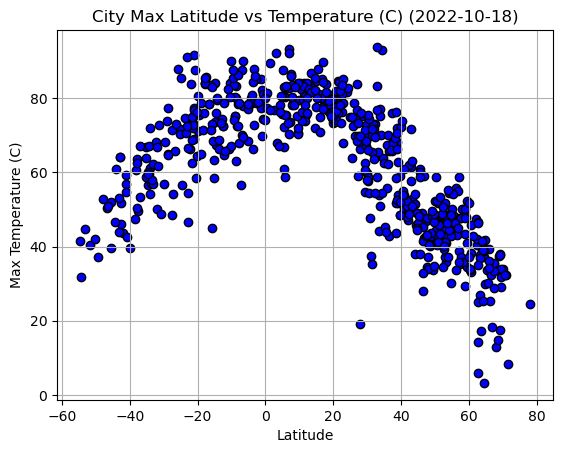

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (C) (2022-10-18)")
plt.grid()

#fig1 = plt.figure()
# Save the figure
plt.savefig("output_data/LatVsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

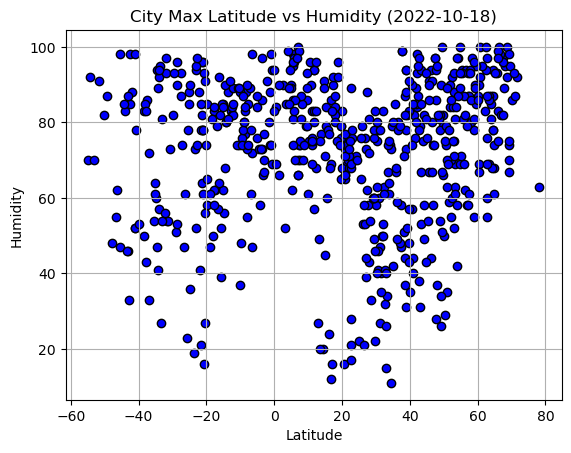

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/LatVsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

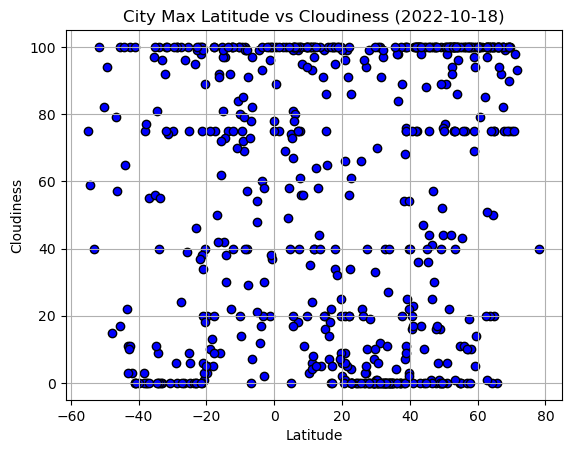

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Cloudiness"]


# Incorporate the other graph properties
plt.scatter(x_values, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

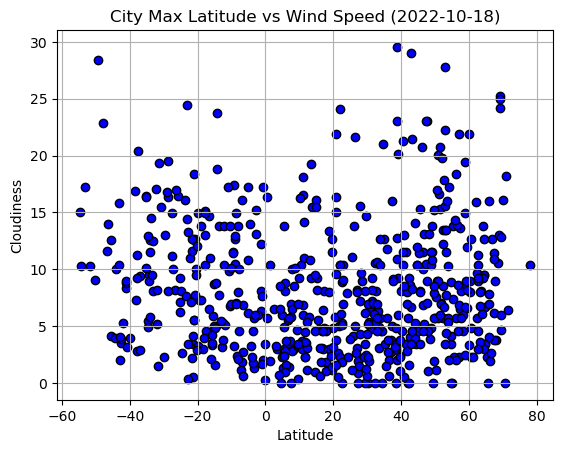

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/LatVsWindSpeed .png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,33.33,83,100,7.85,IS,Mon Oct 16 20:31:31 2023
1,brookings,44.3114,-96.7984,45.75,82,0,3.44,US,Mon Oct 16 20:31:32 2023
2,bethel,41.3712,-73.4140,50.95,82,100,3.44,US,Mon Oct 16 20:27:49 2023
5,anadyr,64.7500,177.4833,30.00,74,20,6.71,RU,Mon Oct 16 20:31:33 2023
6,klaksvik,62.2266,-6.5890,47.32,83,85,15.95,FO,Mon Oct 16 20:31:33 2023


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,margaret river,-33.9500,115.0667,71.89,57,100,12.55,AU,Mon Oct 16 20:31:32 2023
4,lebu,-37.6167,-73.6500,49.51,86,0,20.38,CL,Mon Oct 16 20:31:33 2023
7,ibiruba,-28.6275,-53.0897,65.07,96,100,16.31,BR,Mon Oct 16 20:31:34 2023
8,grytviken,-54.2811,-36.5092,31.77,92,59,10.25,GS,Mon Oct 16 20:31:34 2023
10,puerto ayora,-0.7393,-90.3518,74.55,94,37,1.99,EC,Mon Oct 16 20:31:35 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8741947045511268


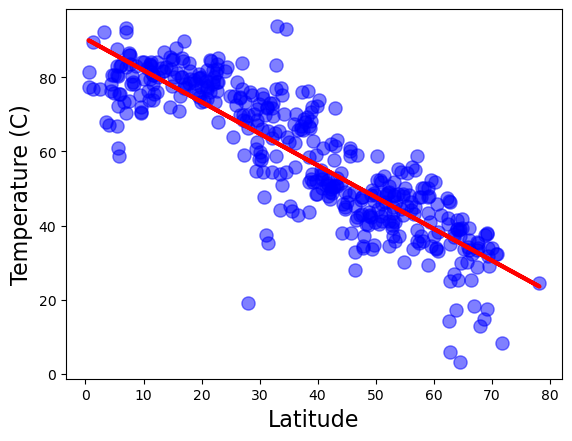

In [25]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/LinearRegreNorthern.png",dpi=300, bbox_inches = "tight")

The r-value is 0.7442719895347091


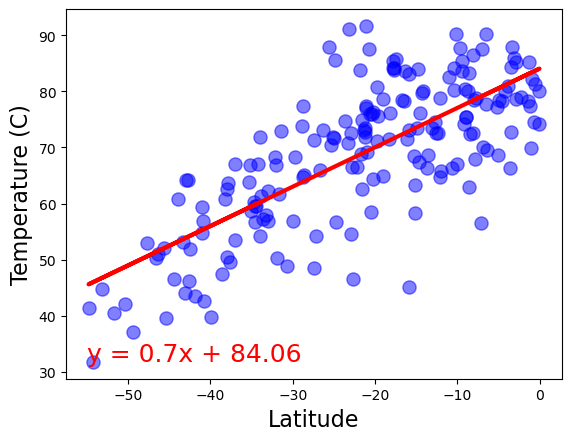

In [26]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.savefig("output_data/LinearRegreSouthern.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** The correlation between Temperature and Latitude is stronger in the Northern Hemisphere as opposed to the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1456321140004329


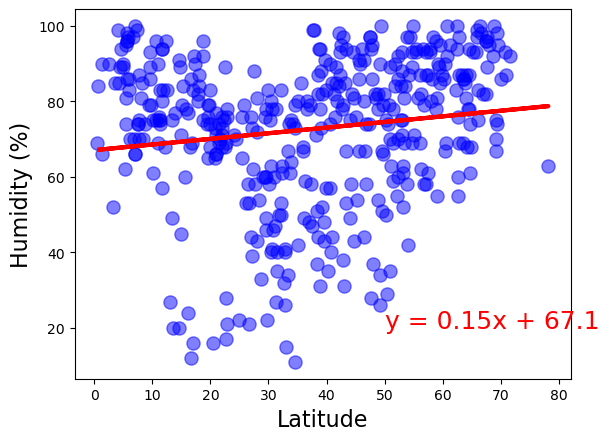

In [28]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/HumidityVsLatNorthen.png",dpi=300, bbox_inches = "tight")

The r-value is 0.15109216690985205


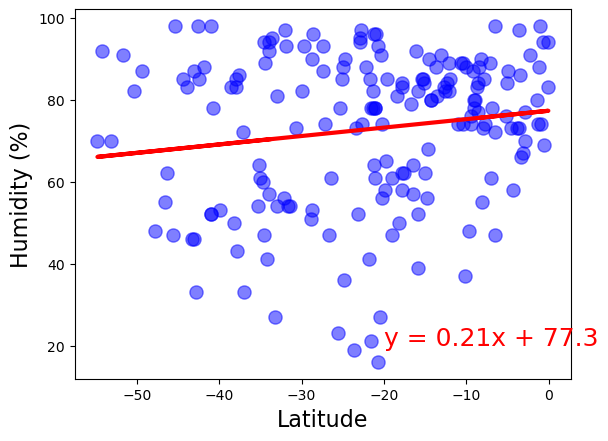

In [29]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/HumidityVsLatSourthen.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** The correlation between Humidity and Latitude is consistent in both the Northern Hemisphere and the Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17931102808024998


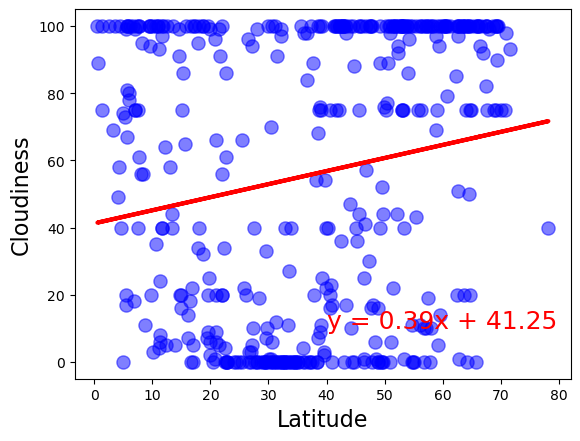

In [30]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/CloudinesVsLatNorthen.png",dpi=300, bbox_inches = "tight")

The r-value is 0.18113199880231828


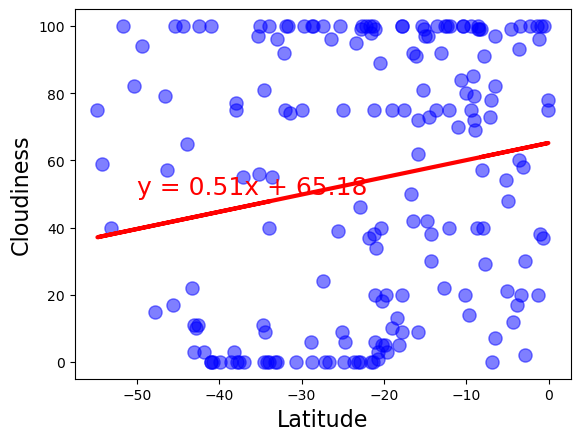

In [31]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/CloudinesVsLatSouthern.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.2283161186472838


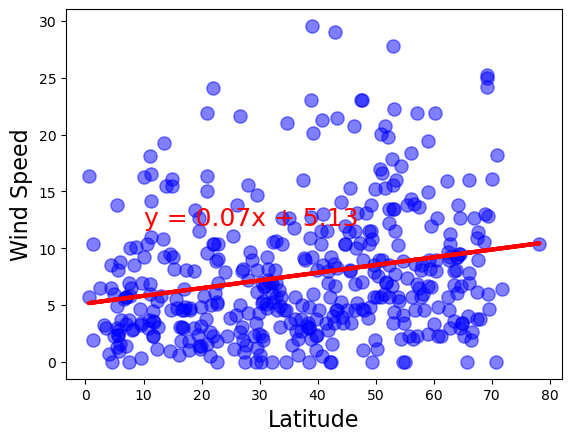

In [35]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.savefig("output_data/WindSpeedVsLatNorthern.png",dpi=300, bbox_inches = "tight")

The r-value is -0.2097405856856087


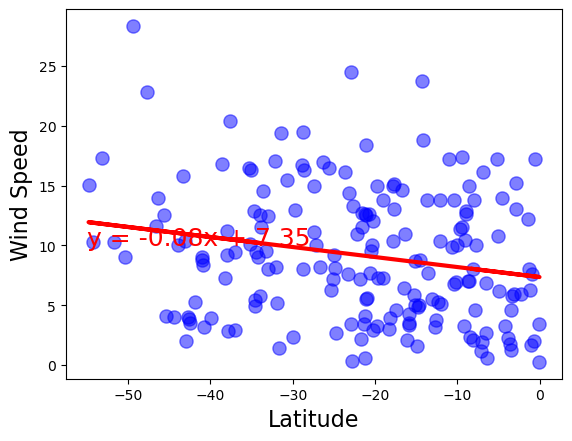

In [36]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 10, "Wind Speed")
plt.savefig("output_data/WindSpeedVsLatSouthern.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** 
The correlation between Wind Speed and Latitude is stronger in the Northern Hemisphere as opposed to the Southern Hemisphere, with both plots indicating that wind speed lowers as we approach the equator.